In [1]:
#importing necessary python packages
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# Importing the dataset
flux = pd.read_excel('LUAD_Flux.xlsx',index_col=0)
genes=pd.read_excel('LUAD_Genes.xlsx',index_col=0)

In [3]:
flux.shape

(517, 1962)

In [4]:
flux.head(2)

,'3DSPHR','3HBCOAHLm','ABTArm','ABTD','ACACT1r','ACACT1rm','ACACT1x','ACOAD9m','ACOAO7p','ACOATA',...,'13HTACRitr','1513TACRitr','1531TACRitr','DEOXFVSitx','FVSitx','TACRitr','13DMTitr','15DMTitr','31DMTitr',Overall Survival (Months)
HUG0_SYMBOL,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,11.448262,154.187481,-583.764387,-14.237357,125.403072,235.338244,457.654536,74.716367,72.493260,-165.591744,...,14.770344,14.770344,14.770344,-431.370763,431.370763,26.309675,-6.000452,-6.000452,-6.000452,0.00
TCGA-05-4249-01,9.173955,162.200877,-442.863722,-5.338254,128.134267,137.492687,149.939274,75.026103,56.620656,-73.252506,...,34.017476,34.017476,34.017476,-219.803538,219.803538,60.593629,-13.819600,-13.819600,-13.819600,50.03


In [5]:
del flux['Overall Survival (Months)']

In [6]:
dt = flux.merge(genes,left_index=True,right_index=True)

In [7]:
dt.head()

,'3DSPHR','3HBCOAHLm','ABTArm','ABTD','ACACT1r','ACACT1rm','ACACT1x','ACOAD9m','ACOAO7p','ACOATA',...,SLTM,SLU7,SLURP1,SMAD2,SMAD3,SMAD4,SMAD5,SMAD6,SMAD7,Survival
HUG0_SYMBOL,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,11.448262,154.187481,-583.764387,-14.237357,125.403072,235.338244,457.654536,74.716367,72.493260,-165.591744,...,-1.1877,3.4584,-0.2752,-0.7736,-0.6896,-0.0017,0.1779,-0.6433,0.7445,0.00
TCGA-05-4249-01,9.173955,162.200877,-442.863722,-5.338254,128.134267,137.492687,149.939274,75.026103,56.620656,-73.252506,...,-0.5540,0.7962,-0.2752,-0.6214,0.0881,1.3829,2.3203,-0.4918,0.0368,50.03
TCGA-05-4250-01,11.167238,96.659688,-661.410699,-14.973614,185.149045,192.183642,403.670235,74.716367,16.444642,-176.456428,...,-1.3805,0.0730,-0.2752,-1.3034,1.0473,-0.3628,0.0526,-0.8961,-1.1245,3.98
TCGA-05-4382-01,9.813735,152.832310,-413.172469,-7.077201,198.790709,137.492687,161.066009,68.272577,57.663478,-83.597986,...,-0.3885,-1.5611,-0.2752,0.3948,-0.6485,0.5367,-0.9418,-0.1446,2.2863,19.94
TCGA-05-4384-01,10.017708,146.338416,-483.996897,-7.935740,151.432371,58.691049,170.595446,52.965875,55.165456,-87.272646,...,0.4227,0.7651,-0.2752,0.2285,-0.4482,0.5020,0.5863,0.3185,-0.3951,13.99


In [8]:
dt.shape

(517, 16768)

In [9]:
X = dt.iloc[:,0:16766]
y = dt.iloc[:, -1].values

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.transform(X_val)

/Users/Zayeem/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Zayeem/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/Zayeem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
/Users/Zayeem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [12]:
sc_y = StandardScaler()
y_train = np.squeeze(sc_y.fit_transform(y_train.reshape(-1, 1)))
y_val = np.squeeze(sc_y.transform(y_val.reshape(-1, 1)))
y_test = np.squeeze(sc_y.transform(y_test.reshape(-1, 1)))

In [13]:
# Create a random forest Regressor
rgr = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)

In [14]:
# Train the Regressor
rgr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [15]:
# Print the name and importance of each feature
for feature in zip(X.columns, rgr.feature_importances_):
    print(feature)

("'3DSPHR'", 2.973023164908817e-06)
("'3HBCOAHLm'", 6.572117083414291e-07)
("'ABTArm'", 1.23863166909347e-05)
("'ABTD'", 0.0)
("'ACACT1r'", 2.2964694243059212e-05)
("'ACACT1rm'", 2.701445838709914e-07)
("'ACACT1x'", 5.222670327851968e-06)
("'ACOAD9m'", 7.712259489386886e-05)
("'ACOAO7p'", 2.7730400340605164e-09)
("'ACOATA'", 1.6238057110808243e-10)
("'ACONT'", 2.2783889100123386e-06)
("'ACONTm'", 0.0)
("'ADK1'", 0.0001624950916008578)
("'ADK1m'", 0.0)
("'ADK3'", 6.220542803556834e-06)
("'ADK3m'", 0.0)
("'ADKd'", 2.8217155775355107e-05)
("'AICART'", 4.408541051020182e-05)
("'AKGDm'", 0.0)
("'AKR1C41'", 0.0)
("'AKR1C42'", 4.273880312066351e-08)
("'ALAR'", 1.0540960815478234e-07)
("'ALATA_L'", 8.336837277944611e-07)
("'ALCD1'", 8.54599277561424e-07)
("'ALDD21'", 0.0)
("'ALOX52'", 2.331856433629981e-06)
("'AMACR2p'", 1.148419540786514e-05)
("'AMPDA'", 0.0001342383776821929)
("'APAT2rm'", 3.0936973028014233e-07)
("'ARTPLM3'", 1.8832173558181478e-06)
("'ASNNm'", 9.357184071699491e-08)
("'ASP

('ARRB1', 0.0008197115017848584)
('ARRB2', 5.0670557608906795e-06)
('ARRDC1', 0.0)
('ARRDC2', 3.3399150843909797e-07)
('ARRDC3', 9.147647537272235e-05)
('ARRDC4', 0.0)
('ARSA', 4.3226893605928813e-08)
('ARSB', 2.764795058108057e-06)
('ARSD', 7.865340390711019e-10)
('ARSE', 8.90086739218137e-10)
('ARSF', 0.0)
('ARSG', 0.0)
('ARSH', 1.4822436086521088e-07)
('ARSI', 2.5683412951499977e-08)
('ARSJ', 6.82809768838821e-05)
('ARSK', 4.940161779866698e-05)
('ART1', 0.0)
('ART3', 0.0013028154511133551)
('ART4', 3.5639249883236135e-06)
('ART5', 0.0)
('ARTN', 3.4654726864056194e-11)
('ARV1', 4.451031098488751e-08)
('ARVCF', 0.0)
('AR', 1.546992432408866e-06)
('AS3MT', 0.00010242904289424365)
('ASAH1', 1.8592652768602763e-06)
('ASAH2', 0.0)
('CLMP', 1.5447830544664008e-05)
('ASAP1', 2.0103879463900143e-05)
('ASAP2', 0.0)
('ASAP3', 0.0)
('ASB10', 0.0)
('ASB11', 3.578297905816229e-05)
('ASB12', 0.0)
('ASB13', 9.532317605458723e-08)
('ASB14', 5.842209370455824e-09)
('ASB15', 0.0)
('ASB16', 9.37899099

('CCNK', 7.51629910717684e-07)
('CCNL2', 0.0)
('CCNO', 2.7763248878593905e-06)
('CCNT1', 2.4456894518645937e-06)
('CCNT2', 0.00025096661794237753)
('CCNYL1', 3.128740014531319e-06)
('CCNY', 5.75092517775309e-07)
('CCPG1', 3.823509588593791e-06)
('CCR1', 2.840225728592882e-06)
('CCR2', 4.4543089508328685e-07)
('CCR3', 1.269332683541307e-06)
('CCR4', 5.181549801372288e-06)
('CCR5', 0.0)
('CCR6', 1.654578199783822e-05)
('CCR7', 5.757505848733231e-05)
('CCR8', 0.0)
('CCR9', 0.0003512516085171732)
('ACKR4', 5.099803873976688e-06)
('CCRL2', 0.0)
('CCRN4L', 5.499012229857026e-06)
('CCS', 1.2614193293719504e-09)
('CCT2', 0.0)
('CCT3', 0.0)
('CCT4', 0.0)
('CCT5', 2.276638696633053e-08)
('CCT6A', 0.0)
('CCT6B', 0.0)
('CCT6P1', 0.0)
('CCT7', 0.0)
('CCT8L2', 0.0)
('CCT8', 0.0)
('CD101', 0.0)
('CD109', 0.0)
('CD14', 4.764855571125383e-09)
('CD151', 8.095156586559788e-07)
('CD160', 7.251613687351806e-06)
('CD163L1', 6.493450142909964e-05)
('CD163', 0.0)
('CD164L2', 0.0)
('CD164', 0.0)
('CD177', 1.05

('FASTKD2', 1.978131433817116e-06)
('FASTKD3', 0.0)
('FASTKD5', 0.0002323086181338336)
('FASTK', 7.420105679033613e-10)
('FAS', 2.1723951196583656e-06)
('FAT1', 3.715627301106578e-05)
('FAT2', 5.2165504760793966e-05)
('FAT3', 2.3895185489993874e-07)
('FAT4', 2.3279112655084434e-07)
('FATE1', 3.0975511649746915e-08)
('FAU', 1.447992337573807e-06)
('FBF1', 2.399937624920837e-08)
('FBLIM1', 0.0001295273755786949)
('FBLL1', 4.599231160923339e-08)
('FBLN1', 0.0)
('FBLN2', 1.2001578091759935e-05)
('FBLN7', 0.0)
('FBL', 7.733113498147236e-09)
('FBN1', 0.0)
('FBN2', 1.849051650655685e-05)
('FBN3', 0.0)
('FBP1', 7.615270646689741e-08)
('FBP2', 6.219668296086549e-10)
('FBRSL1', 0.0)
('FBRS', 4.6125202106653365e-07)
('FBXL12', 0.0)
('FBXL13', 0.0)
('FBXL14', 6.198161854484729e-05)
('FBXL15', 1.1842814071233903e-08)
('FBXL16', 6.340148914309727e-07)
('FBXL17', 1.5998979690073843e-07)
('FBXL18', 2.269066594973931e-06)
('FBXL19', 7.98303358065426e-08)
('FBXL20', 2.9979795856589055e-05)
('FBXL21', 0.

('LDLRAP1', 0.0)
('LDLR', 0.0)
('LDOC1L', 5.841143019225723e-06)
('LDOC1', 0.0)
('LEAP2', 0.0)
('LECT1', 1.8046728119969472e-05)
('LECT2', 0.0)
('LEF1', 3.1576979457148346e-07)
('LEFTY1', 0.0)
('LEFTY2', 7.152254321575806e-05)
('LEKR1', 0.0)
('LELP1', 4.359249381470397e-06)
('LEMD1', 5.52852923045137e-07)
('LEMD2', 3.795476505115678e-05)
('LEMD3', 1.8701608422588389e-07)
('LENEP', 0.0003168883945446499)
('LENG1', 2.8766134187411435e-05)
('LENG9', 3.498184827715461e-05)
('LEO1', 1.3907862751526742e-05)
('P3H1', 2.7957718703637107e-06)
('P3H2', 0.0)
('P3H3', 0.0)
('LEPROTL1', 1.7083646986045324e-06)
('LEPROT', 2.435402501017611e-09)
('LEPR', 1.6558087650847e-08)
('LEP', 1.5249883779791584e-08)
('LETM1', 0.0)
('LETM2', 9.41253709101539e-06)
('LETMD1', 9.082148618523923e-06)
('LEUTX', 0.0)
('LFNG', 1.2533529576726333e-05)
('LGALS12', 0.0)
('LGALS13', 0.0)
('LGALS14', 0.0)
('LGALS1', 0.0)
('LGALS2', 8.076544364062302e-07)
('LGALS3BP', 3.3242331185749436e-05)
('LGALS3', 0.0)
('LGALS4', 0.0)


('PDLIM7', 5.8651854776491006e-08)
('PDP1', 0.0)
('PDP2', 4.656136669702761e-08)
('PDPK1', 0.0)
('PDPN', 9.077988589660648e-08)
('PDPR', 1.289735727694739e-05)
('PDRG1', 2.9476437281380585e-06)
('PDS5A', 3.246108777541041e-05)
('PDS5B', 1.1178398108925898e-05)
('PDSS1', 5.540524218829734e-06)
('PDSS2', 2.3319482095646076e-07)
('PDX1', 1.9453015587756355e-06)
('PDXDC1', 0.0)
('PDXDC2P', 0.0)
('PDXK', 0.0)
('PDXP', 0.0)
('PDYN', 3.4259759341949087e-06)
('PDZD11', 0.0)
('PDZD2', 0.0)
('PDZD3', 2.438288836590074e-06)
('PDZD4', 0.0)
('PDZD7', 1.1660125470829352e-07)
('PDZD8', 2.6659015738133126e-07)
('PDZD9', 3.122425005314966e-05)
('PDZK1IP1', 3.330033344570084e-07)
('PDZK1', 0.0)
('PDZRN3', 0.0)
('PDZRN4', 0.0)
('PEA15', 0.0)
('PEAR1', 2.2010900212231145e-06)
('PEBP1', 0.00020434341649798904)
('PEBP4', 0.0)
('ECI2', 0.0)
('PECR', 2.963528014774925e-06)
('PEF1', 0.0)
('PEG10', 0.00010922123554253184)
('PEG3', 2.8214996374487762e-08)
('PELI1', 3.628409188048551e-09)
('PELI2', 7.914547595175

In [16]:
#Select the best features from the regressor
sfm = SelectFromModel(rgr)

In [17]:
# Train the Regressor
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [18]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(X.columns[feature_list_index])

'ACOAD9m'
'ADK1'
'AMPDA'
'BUP2'
'CYTK1n'
'EBP1r'
'ETF'
'FA161ACPH'
'FACOAL161'
'FUMm'
'GAPD'
'GLPASE2'
'HMGCOASi'
'ILETA'
'MDH'
'NDPK7'
'P45027A12m'
'PEPCKm'
'RNDR4'
'TKT2'
'TYRTA'
'r0139'
'r0321'
'r0413'
'r0431'
'r0641'
'r0695'
'r0712'
'r1109'
'r1156'
'r1384'
'RE2273E'
'RE3556C'
'FAOXC24C22x'
'FADH2ETC'
'ABTti'
'ABUTt4_2_r'
'ACACt2'
'ACCOAtn'
'ACt2m'
'ADRNt'
'ALADGLNexR'
'ARACHDtr'
'ARGt4'
'ARGtm'
'ASNt4'
'ATPtx'
'CRNtim'
'FUMtm'
'GLNALANaEx'
'GLNASNNaEx'
'H2O2tp'
'H2Otp'
'L_LACt2r'
'MALSO4tm'
'MALtm'
'NAHCO3_HCLt'
'OCDCEAtr'
'PCHOL_HSter'
'PPItr'
'SERDGLNexR'
'SERGLYexR'
'TAURt4_2_r'
'TRPt4'
'XYLTt'
'r1088'
'r1557'
'r1560'
'r1595'
'r1616'
'r1628'
'r1632'
'r1648'
'r1651'
'r1661'
'r1670'
'r1710'
'r1715'
'r1716'
'r1732'
'r1827'
'r1831'
'r1842'
'r1920'
'r1974'
'r1976'
'r1995'
'r1997'
'r2003'
'r2080'
'r2097'
'r2106'
'r2111'
'r2119'
'r2121'
'r2124'
'r2139'
'r2140'
'r2210'
'r2248'
'r2262'
'r2278'
'r2314'
'r2320'
'r2352'
'r2353'
'r2357'
'r2374'
'r2449'
'r2486'
'r2516'
'ASNATB0tc'
'LEUATB0tc'

In [19]:
sfm.get_support().sum()

1768

In [20]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_val = sfm.transform(X_val)
X_important_test = sfm.transform(X_test)

In [21]:
rgr_important = GradientBoostingRegressor()

# Train the new Regressor on the new dataset containing the most important features
rgr_important.fit(X_important_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [22]:

y_predval = rgr_important.predict(X_important_val)

In [23]:
#Compare The Accuracy Of Our Full Feature Classifier To Our Limited Feature Classifier
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

from sklearn.metrics import r2_score
accuracy=r2_score(y_val,y_predval)

print('R2 Score')
print(accuracy)

0.6435371777232637
0.7588286356629205
0.8711077061207302
R2 Score
-0.08923121226163278


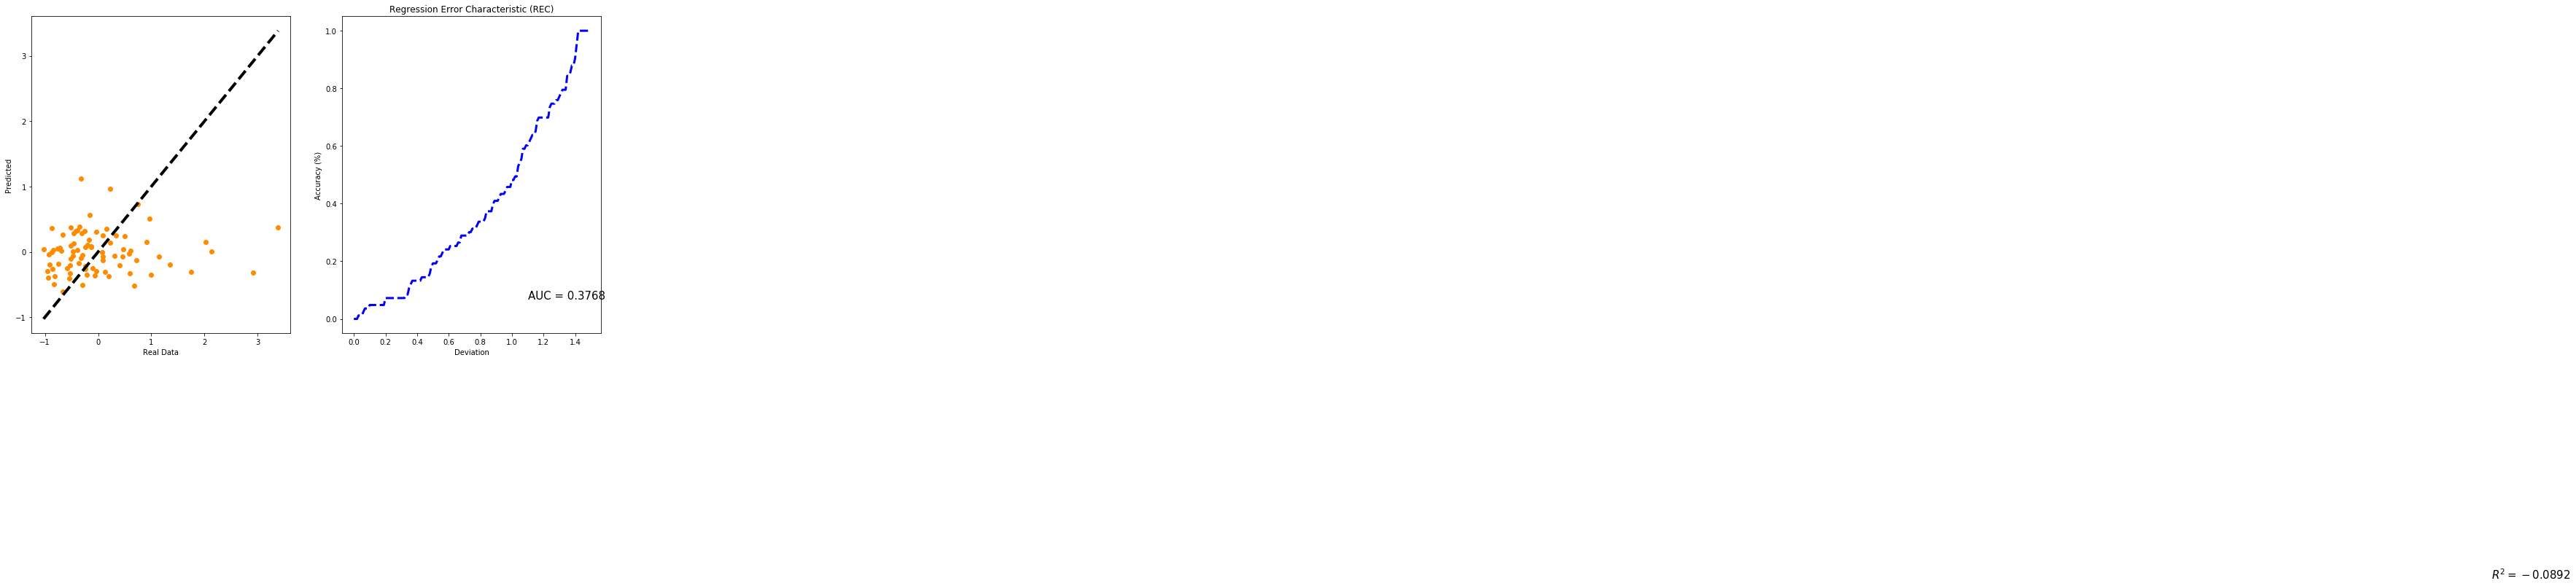

In [25]:
# Visualising the Decision Tree Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
plt.figure(figsize=(14 , 8))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
plt.text(45, -5, r"$R^2 = %0.4f$" %RR , fontsize=15)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()

In [26]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {  'learning_rate':[0.005,0.001,0.01,0.05,0.1,0.5,0.9,1.0,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100],
                 'n_estimators': [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70] ,
              'max_depth': [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,90,95,100],
              'min_samples_split':[0.005,0.001,0.01,0.05,0.1,0.5,0.9,1.0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],
              'min_samples_leaf':[0.1,0.20,0.3,0.4,0.5],
              'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5],
              'max_features': [1,2,3,4,5,6,7,8,9,10]
                 }  
regressor = GradientBoostingRegressor()
random=RandomizedSearchCV(estimator=regressor,param_distributions=param_grid,cv=3,n_jobs=-1)
random_result=random.fit(X_important_train,y_train)
print("Best: %f using %s" % (random_result.best_score_,random_result.best_params_))

Best: -0.031216 using {'n_estimators': 30, 'min_weight_fraction_leaf': 0.4, 'min_samples_split': 95, 'min_samples_leaf': 0.5, 'max_features': 8, 'max_depth': 50, 'learning_rate': 0.001}


In [27]:

regressor = GradientBoostingRegressor(learning_rate=0.001,n_estimators=30,max_depth=50,min_samples_split = 95,min_samples_leaf=0.5,min_weight_fraction_leaf=0.4,max_features=8)

regressor.fit(X_important_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.001, loss='ls', max_depth=50, max_features=8,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=0.5,
             min_samples_split=95, min_weight_fraction_leaf=0.4,
             n_estimators=30, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
y_predval = regressor.predict(X_important_val)

In [29]:

# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

from sklearn.metrics import r2_score
accuracy=r2_score(y_val,y_predval)

print('R2 Score')
print(accuracy)

0.6102179949219269
0.6966250746994189
0.8346406859837465
R2 Score
5.648318237816419e-05


R^2 = 0.0001


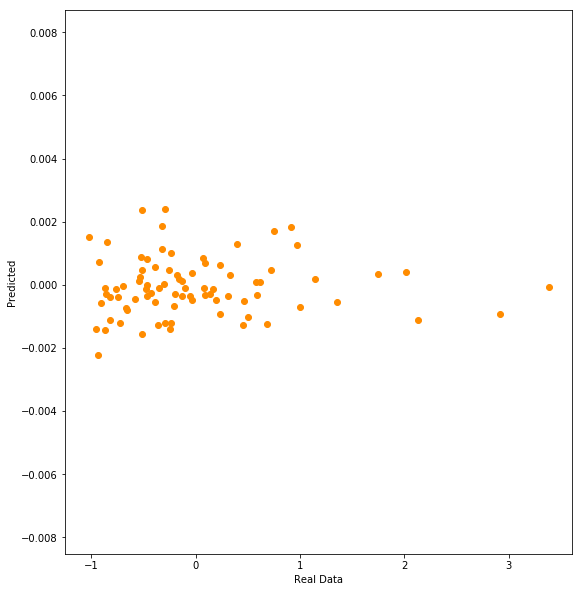

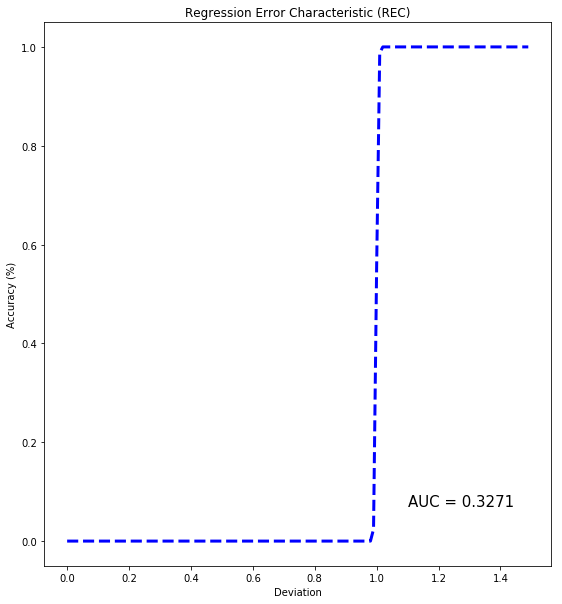

In [30]:
# Visualising the Random Forest Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
plt.figure(figsize=(20 , 10))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.figure(figsize=(20 , 10))
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
print("R^2 = %0.4f" %RR)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()